# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p';
validation_file='valid.p';
testing_file = 'test.p';

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np;
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
    
n_classes = np.unique(y_train).size;

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Number of Validation examples =", n_validation)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Number of Validation examples = 4410


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

33


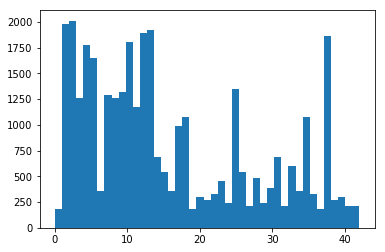

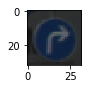

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline
# plotting the count of each sign
plt.hist(y_train,n_classes ); # input, number of bins

# showing a random image
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

###### Data Analysis

Here we training set classes are bit skewed, some of classes have more examples than others. This might lead to the neural model overfitted for classes with large number of examples and underfit for the classes with insufficient examples. To overcome this problem I thought of generating some data for the classes below threshold and bring their number to the mean.

###### Generating fake data
The idea is to increase the number of examples of images for certain classes particularly the ones with less number of examples (below mean is a good measure). Checking for the classes of the images by iterating through the images and generate that many number of examples for that class that helps reach the mean. The images are generated from existing images by using looping through to pick a random angle to rotate using scipy's rotate function.

- These new set of images are again split between training and validation set to prevent overfitting of the model. train_test_split(X_train, y_train, stratify = y_train, test_size=0.1..) function is used to split the data. The newly generated training and validation data is added to the existing data set.

Generating fake data.
Fake data generated.
Number of Validation examples = (9082,)


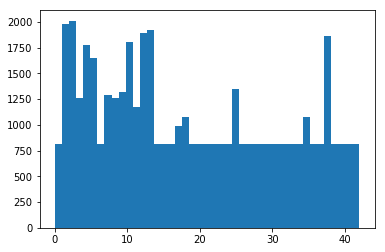

In [5]:
from scipy import ndimage
import random
from sklearn.utils import shuffle;

#Reference: Stack Overflow

num_imagesClass = np.bincount(y_train)
mean_pics = int(np.mean(num_imagesClass))
min_desired = int(mean_pics)

print('Generating fake data.')

# Angles to be used to rotate images in additional data made
angles = [-10, 10, -15, 15, -20, 20]

# Iterate through each class
for i in range(len(num_imagesClass)):
    
    # Check if less data than the mean
    if num_imagesClass[i] < min_desired:
        
        # Count how many additional pictures we want
        new_wanted = min_desired - num_imagesClass[i]
        picture = np.where(y_train == i)
        more_X = []
        more_y = []
        
        # Make the number of additional pictures needed to arrive at the mean
        for num in range(new_wanted):
            
            # Rotate images and append new ones to more_X, append the class to more_y
            more_X.append(ndimage.rotate(X_train[picture][random.randint(0,num_imagesClass[i] - 1)], random.choice(angles), reshape=False))
            more_y.append(i)
        
        # Append the pictures generated for each class 
        X_train = np.append(X_train, np.array(more_X), axis=0)
        y_train = np.append(y_train, np.array(more_y), axis=0)
        
print("Fake data generated.");
      
plt.hist(y_train,n_classes );


# Splitting the training dataset into training and validation data
from sklearn.model_selection import train_test_split

# Shuffing
X_train, y_train = shuffle(X_train, y_train)

# Splitting it to prevent overfitting
X_train, X_MoreValid, y_train, y_MoreValid = train_test_split(X_train, y_train, stratify = y_train, test_size=0.1, random_state=25);
X_valid=np.append(X_valid,np.array(X_MoreValid), axis=0)
y_valid=np.append(y_valid,np.array(y_MoreValid), axis=0)

print("Number of Validation examples =", y_valid.shape)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### Feel free to use as many code cells as needed.

import cv2;
from numpy import newaxis

def preprocessing(images):
    grayimages = grayScaling(images);
    return normalize(grayimages);
    
def grayScaling(images):
    grayimages=[];
    for image in images:
        grayimages.append(grayscale(image));
    y=np.array(grayimages);
    return y[...,newaxis];

#normalize
def normalize(images):
    #images -= np.mean(images, axis = 0);
    #images /= np.std(images, axis = 0);
    #return images;
    return images / 255 * 0.8 + 0.1
    

### converting to grayscale, etc.
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY);

###### PreProcessing
To preProcess the data is to prepare the data to be fed to the neural network or any other model. First thing in preprocessing was to :
1. Normalize: Any dataset would contain some noise with some very large values and some very small values. These datapoints lead to divergence of the model or might lead to convergence to some local minima. Normalizing the values help in avoiding these problems, keeping the values between .1 - .9. 

2. RGB to GRAY: Data had 3 channels RGB, but looking at the examples and the problem statement, and from previous project I realized that this particular problem of classification does not actually require to provess 3 channels. So as to avoid complexity and to speedup the processing, I converted the data to Grayscale such that model is able to focus on important features of the images.

3. Reformat: Also we need to ensure that all the images follow the same size as expected by training model. This is to convert the data into row format such that it becomes easier to extract the features and model can be trained on those features. 
a. After grayscale it was required to convert it back into the array.
b. Also, during the grayscale its shape got changed to 32*32, I used numpy library to convert it back to 32*32*1.
Another important part was neural networks required the input to be of the shape 32*32*1. Later for test data which had images of different sizes, I used numpy resize function to align its size according to the model.


### Model Architecture

In [7]:
### Define your architecture here.
print("#PreProcessing....");
X_train = preprocessing(X_train);
print("#PreProcessing complete ...Shape  ",X_train.shape);

X_valid = preprocessing(X_valid);
print("#PreProcessing complete ...ValidationData Shape  ",X_valid.shape);
X_test = preprocessing(X_test);
print("#PreProcessing complete ...TestingData Shape  ",X_test.shape);
### Feel free to use as many code cells as needed.

#PreProcessing....
#PreProcessing complete ...Shape   (42042, 32, 32, 1)
#PreProcessing complete ...ValidationData Shape   (9082, 32, 32, 1)
#PreProcessing complete ...TestingData Shape   (12630, 32, 32, 1)


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
### Train your model here.
from tensorflow.contrib.layers import flatten;

print("#Building the Model");
def neuralModel(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.avg_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits;


#Building the Model


###### Model Architecture

The model is similar to LeNet model described in the lectures which includes couple of convolution layers with averaging pooling (avg_pool worked better than max_pool as in max_pool we loose some of the feature information as it takes max value of the pool but with avg_pool we do involve characteristics of all features, hence loose less information which leads to little better results). The pooling layer's function is to progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the network, and hence to also control overfitting. The Pooling Layer operates independently on every depth slice of the input and resizes it spatially. The convolution layers are followed by full mesh topology with the addition of drop outs as the regulation technique to prevent overfitting. This improved the performance upto 3-5%. 

Layer 1 - Convolutional. Input = 32x32x1. Output = 28x28x6 with relu for Activation. 
Avg-Pooling. Input = 28x28x6. Output = 14x14x6.

Layer 2 - Convolutional. Output = 10x10x16. with Relu for activation followed by pooling.
AvgPooling - Input = 10x10x16. Output = 5x5x16.

We flatten the output and use the fully connected network beyond this layer. 

Layer 3: Fully Connected. Input = 400. Output = 120. Then Relu and dropout with prob .7. The value of .7 is obtained using trial and error, this gives the best performance and the explaination would be it is the optimul balance between underfitting and overfitting.

Layer 4: Fully Connected. Input = 120. Output = 84 with relu for Activation and dropout with prob = 0.7

Layer 5: Fully Connected. Input = 84. Output = 43 this returns the logit.

###### Features and Labels

In [9]:
import tensorflow as tf
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes);

EPOCHS = 25
BATCH_SIZE = 128

###### Training Pipeline

In [27]:
rate = 0.005

logits = neuralModel(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

###### Training Parameters
Most of the parameters are same as of the LeNet architecture.

1. Learning Rate : .005 Increasing/Decreasing the rate decreases the accuracy of the model. Learning rate is used to help the model converge towards the minima; if we rate is too high, we might miss it and if it is too less it would be very slow and would require more processing and more time. 

Reference: https://stackoverflow.com/questions/36162180/gradient-descent-vs-adagrad-vs-momentum-in-tensorflow
2. Optimizer: AdamOptimizer seems to work better than gradient descent. In comparison to SGD every parameter has different learning rate and model stores that information. It also stores the momentum changes for each of them separately. It fixes the momentum problem with SGD where when we are very close to the goal, our momentum in most of the cases is very high and it does not know that it should slow down. This can cause it to miss or oscillate around the minima.

3. softmax function
4. Epochs 20: With each epoch the model was learning better until it started memorizing. The accuracy kept improving until 20 epochs after which it decreases. 20 works best.

5. Batch_size: 128 This was derived from LeNet. I tried few batch sizes but 128 gave the best results.

6. Mean and Standard Deviation: 0 and .1 respectively. Model is generally designed to keep mean around 0 and equal variances. 

##### Model Evaluation

In [28]:
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 0.7})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

###### Training the Model

In [29]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 0.7})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './trafficclassifier')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.686

EPOCH 2 ...
Validation Accuracy = 0.799

EPOCH 3 ...
Validation Accuracy = 0.844

EPOCH 4 ...
Validation Accuracy = 0.863

EPOCH 5 ...
Validation Accuracy = 0.869

EPOCH 6 ...
Validation Accuracy = 0.872

EPOCH 7 ...
Validation Accuracy = 0.893

EPOCH 8 ...
Validation Accuracy = 0.879

EPOCH 9 ...
Validation Accuracy = 0.901

EPOCH 10 ...
Validation Accuracy = 0.906

EPOCH 11 ...
Validation Accuracy = 0.918

EPOCH 12 ...
Validation Accuracy = 0.916

EPOCH 13 ...
Validation Accuracy = 0.908

EPOCH 14 ...
Validation Accuracy = 0.913

EPOCH 15 ...
Validation Accuracy = 0.909

EPOCH 16 ...
Validation Accuracy = 0.908

EPOCH 17 ...
Validation Accuracy = 0.922

EPOCH 18 ...
Validation Accuracy = 0.909

EPOCH 19 ...
Validation Accuracy = 0.909

EPOCH 20 ...
Validation Accuracy = 0.915

EPOCH 21 ...
Validation Accuracy = 0.920

EPOCH 22 ...
Validation Accuracy = 0.919

EPOCH 23 ...
Validation Accuracy = 0.922

EPOCH 24 ...
Validation Accura

###### Solution Approach

With the base model taken from LeNet architecture, the model gives accuracy of 89%. So as to increase the accuracy of the model I tried to find the differences between this problem statement (classify traffic signs) with LeNet. One of the problem was that training data was not balanced which we fixed by generating more data for the corresponding classes. Another important thing was to add drop out to prevent overfitting of the model.

Next accuracy reached around 91.5% with these changes. So i figured optimizing for the hyperparameters would help and that indeed helped. I played around with epoch, keep probability of drop out, Learning Rate, Batch Size. And current configuration gave me the best results. 

###### Report on Testing Data

In [30]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.884


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Image Shape:  (32, 32, 3)


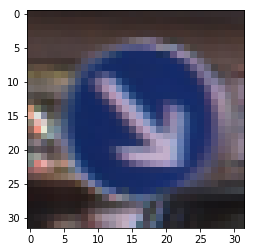

Image Shape:  (32, 32, 3)


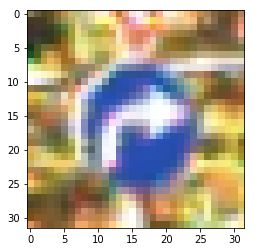

Image Shape:  (32, 32, 3)


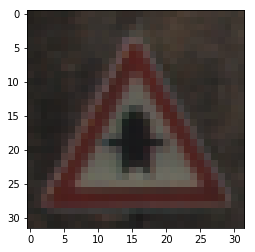

Image Shape:  (32, 32, 3)


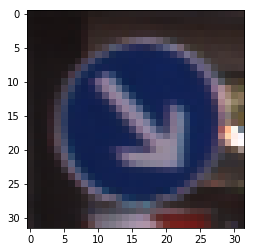

Image Shape:  (32, 32, 3)


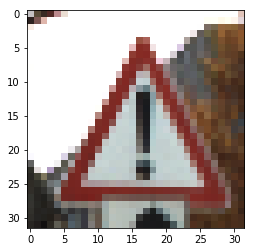

 New Test Data shape:  (5, 32, 32, 3)


In [31]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
# GTSRB/Final_Test/Image - image location
# Needs to read the images from the directory..

#Ref: https://stackoverflow.com/questions/4101576/importing-ppm-images-with-python-and-pil-module
from scipy.misc import imread


newImages=[];
for i in range(2,7):
    imageName = "0000";
    imageName=imageName+str(i)+'.ppm';
    image = imread(imageName)
    image = cv2.resize(image, (32,32))
    print("Image Shape: ",image.shape);
    newImages.append(image)
    plt.imshow(image)
    plt.show()

newImages = np.array(newImages)
print(" New Test Data shape: ", newImages.shape)
## preProcessing of these


###### Acquiring New Images
Downloaded the german dataset and copied first 10 images for the test set but would be using only first 5. The description of images are as follows:
1. Keep right
2. turn right
3. Right-of-way at the next intersection
4. keep right
5. General Caution

Problem with these images is they have pretty less resolution. Moreover the sizes of each of the image were different. So as part of normalization and for network to process the image, I resized them to 32*32*1 which again lead to some loss of the features. But since the test data chosen is pretty general in nature (e.g. speed sign with speed on it would be really difficult, as with each feature lost it would have lost some of the information) but our cases are quite general and model works decently on them.

### Predict the Sign Type for Each Image

In [32]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
print("#PreProcessing....");
Test = preprocessing(newImages);
print("#PreProcessing complete ...Shape  ",Test.shape);


with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    resultClasses = sess.run(logits, feed_dict={x: Test,keep_prob:1.0})
print(resultClasses)



#PreProcessing....
#PreProcessing complete ...Shape   (5, 32, 32, 1)
[[ -91.52598572  -45.36956406  -19.07280922  -25.93395424  -63.92874908
   -25.99678421 -120.62067413  -73.44573212  -33.80703735  -17.57327461
   -13.65610313  -59.00670242    1.55254161  -23.61117744  -23.52791214
   -11.26070118  -68.70853424  -37.89386368  -83.95969391  -83.8508606
    -7.93831921 -114.23210907  -62.70837402  -33.83887863 -106.32604218
    -9.8211565   -61.64168167 -123.61574554  -35.55701065  -35.47094345
   -93.35824585  -53.90933609  -24.6216526  -126.99468231  -34.49496841
   -34.40723038  -43.81177139 -102.41687775   47.14641571  -89.71949768
   -44.44931412  -27.10902214  -85.15719604]
 [ -12.17215443  -21.68449402  -23.92544365  -23.05381966  -21.0388546
   -27.15561104  -67.32695007  -30.27405167  -40.76695633   -9.11277866
   -11.58470821   -8.63482475   -4.72699547  -10.08189774   -0.71800268
   -16.028759    -15.92474079  -10.72454929    2.16213989  -34.6456871
   -30.88448143  -26.8121

### Analyze Performance

In [33]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
testsetLabels=[];
testsetLabels.append(38); # keep right
testsetLabels.append(33); # turn right
testsetLabels.append(11); 
testsetLabels.append(37); 
testsetLabels.append(18); 
testSet = np.array(testsetLabels);
print(testSet)


with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(Test, testSet)
    print("Test New Images Accuracy = {:.3f}".format(test_accuracy))

[38 33 11 37 18]
Test New Images Accuracy = 0.800


###### Accuracy on Unknown Data

Model works decently well and gives 80% accuracy. To test the accuracy, I refered to CSV file and manually added labels for the test set. 
One of the reasons is the test set chosen is quite unique and based on the features it is easy to identify those signs. I would suspect that this model would not work that well on more complicated data e.g. speed sign to detect the speed. One of the improvements would be to get equal sized or generically crafted test set, since I modified it at my own will, there was definitely some loss in features and resolution which would cause model to degrade. Further increasing the epochs should also help.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [34]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

soft = tf.nn.softmax(logits);
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    result =sess.run(soft, feed_dict={x: Test,keep_prob:1.0}) 
    top5Results = sess.run(tf.nn.top_k(result,k=5,sorted=True));
   # topn = 
    
#print(topn);
for i in range(5):
    print("Top 5 Results for image:",i," are probabilities: ",top5Results[0][i], " Classes are: ",top5Results[1][i])


Top 5 Results for image: 0  are probabilities:  [  1.00000000e+00   1.58063391e-20   1.19399679e-24   1.81676257e-25
   4.30637473e-26]  Classes are:  [38 12 20 25 15]
Top 5 Results for image: 1  are probabilities:  [  1.00000000e+00   2.05066879e-08   1.13507763e-08   1.15097443e-09
   8.98017077e-11]  Classes are:  [33 18 26 14 35]
Top 5 Results for image: 2  are probabilities:  [  9.99998093e-01   1.95019902e-06   2.29213604e-09   1.25271160e-09
   5.36346356e-10]  Classes are:  [11 30 27 12 18]
Top 5 Results for image: 3  are probabilities:  [  1.00000000e+00   1.30030997e-17   9.97254682e-21   1.76189147e-21
   2.42000640e-22]  Classes are:  [38 12 20 25 15]
Top 5 Results for image: 4  are probabilities:  [  1.00000000e+00   3.76818715e-10   4.51479166e-14   1.34533267e-17
   1.09112474e-20]  Classes are:  [18 26 33 11 35]


###### Top 5 classes and Probabilities
The above result shows the models top 5 results for each example and also shows the classes corresponding to those probabilities.
The model could not identify image 4 which was keep right. It was bit wierd because of the case was identified by it. This is of course lower than the accuracy of 85% achieved on the test data, but still would be fairly good for not having curated the images exactly like whomever did so on the original dataset.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [35]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")